# Читаем базу

In [1]:
import pandas as pd

In [79]:
base_5 = pd.ExcelFile('/content/drive/MyDrive/Системный Блок/пишу тебе/открытки базы/_Расшифровка открыток 5 (ярмарка проектов).xlsx')
base_5 = pd.read_excel(base_5, 'Открытки')
base_5 = base_5.rename(columns={'Unnamed: 0': 'Номер открытки'})
base_5 = base_5[(~base_5['Pic_url_1'].isna()) & (~base_5['Номер открытки'].isna())]
base_5['Номер открытки'] = base_5['Номер открытки'].astype(int)
base_5 = base_5.sort_values(by='Номер открытки').reset_index().drop('index', axis=1)
base_5.head()

,Номер открытки,Pic_url_1,Pic_url_2,Разрешение на публикацию,Источник,Была ли открытка отправлена по почте,"Название коллекции (если вы хотите подпись на сайте). Например, личная коллекция Василия Иванова.","Комментарий или метаинформация. Укажите тут любую метаинформацию про открытку, которую считаете важной. Например, какое-то знание или история, которую нельзя восстановить по тексту открытки.",Заливщик,Разметчик,...,Почему интересна,Id поста на сайте,Дата заливки,Оценка,Сгенерированные заголовки,image_tag_1,image_tag_2,image_tag_3,image_tag_4,image_tag_5
0,215454,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,215460,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,Лыкова Елена (ЯП6),...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,215465,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,Кулешова Екатерина (ЯП6),...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,215485,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,Рафаилова Алина (ЯП6),...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,215496,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
base_5.shape

(3867, 64)

# Проверяем валидность ссылок на хранилище

In [89]:
base_5['Статус (распределено, в процессе, завершено, проблема)'].value_counts()

Проверено                                         1756
Завершено                                          679
Распределено                                       665
Ожидает проверки                                   313
Готово к расшифровке                               307
Исключено/ дубликат                                 39
Помощь модератора/ не разобрать слова в тексте      25
Помощь модератора/ иностранный язык                 25
В процессе                                          21
Исключено                                           10
Исключено/ трудный почерк                            6
Name: Статус (распределено, в процессе, завершено, проблема), dtype: int64

Добавляем данные с предыдущих проверок

In [ ]:
url_validity_prev = pd.read_csv('base_5_url_validity.csv', index_col=0)
base_5 = base_5.merge(url_validity_prev, on=['Номер открытки', 'Pic_url_1', 'Pic_url_2'], how='left')

Проверить нужно открытки со статусом "Готово к расшифровке" и "Распределено", если еще не проверялись

In [78]:
import requests
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [93]:
def is_valid_url(url):
  if pd.isna(url):
    return False
  response = requests.get(url)
  return response.status_code == 200

In [ ]:
base_5['Pic_url_1_valid'] = base_5.progress_apply(
    lambda row: is_valid_url(row['Pic_url_1']) 
    if pd.isna(row['Pic_url_1_valid']) and row[
        'Статус (распределено, в процессе, завершено, проблема)'
        ].isin(['Распределено', 'Готово к расшифровке'])
    else row['Pic_url_1_valid'], 
    axis=1
)

base_5['Pic_url_2_valid'] = base_5.progress_apply(
    lambda row: is_valid_url(row['Pic_url_2']) 
    if pd.isna(row['Pic_url_2_valid']) and row[
        'Статус (распределено, в процессе, завершено, проблема)'
        ].isin(['Распределено', 'Готово к расшифровке'])
    else row['Pic_url_2_valid'], 
    axis=1
)

Результат

In [95]:
base_5['Pic_url_1_valid'].value_counts()

True    972
Name: Pic_url_1_valid, dtype: int64

In [96]:
base_5['Pic_url_2_valid'].value_counts()

True    971
Name: Pic_url_2_valid, dtype: int64

In [101]:
base_5[base_5['Pic_url_2'].isna()]

,Номер открытки,Pic_url_1,Pic_url_2,Разрешение на публикацию,Источник,Была ли открытка отправлена по почте,"Название коллекции (если вы хотите подпись на сайте). Например, личная коллекция Василия Иванова.","Комментарий или метаинформация. Укажите тут любую метаинформацию про открытку, которую считаете важной. Например, какое-то знание или история, которую нельзя восстановить по тексту открытки.",Заливщик,Разметчик,...,Дата заливки,Оценка,Сгенерированные заголовки,image_tag_1,image_tag_2,image_tag_3,image_tag_4,image_tag_5,Pic_url_1_valid,Pic_url_2_valid
783,224212,https://storage.yandexcloud.net/postcards-open...,NaN,Разрешаю публикацию,Найдено в интернете,NaN,NaN,NaN,NaN,Лемешко Валентина (ЯП6),...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


Сохраняем

In [98]:
base_5[[
    'Номер открытки', 'Pic_url_1', 'Pic_url_2', 'Pic_url_1_valid','Pic_url_2_valid'
    ]].to_csv('base_5_url_validity.csv')

# Считаем хеши открыток

Оставляем только новые открытки, которые были найдены в интернете и еще не проверены --- статус "Ожидает проверки"

In [4]:
base_5 = base_5[base_5['Статус (распределено, в процессе, завершено, проблема)'] == 'Ожидает проверки']
base_5.shape

(313, 64)

In [5]:
base_5[['Номер открытки', 'Статус (распределено, в процессе, завершено, проблема)']].head()

,Номер открытки,"Статус (распределено, в процессе, завершено, проблема)"
3554,228356,Ожидает проверки
3555,228357,Ожидает проверки
3556,228358,Ожидает проверки
3557,228359,Ожидает проверки
3558,228360,Ожидает проверки


In [6]:
!pip install imagehash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.7 MB/s eta 0:00:00


In [7]:
from bs4 import BeautifulSoup
import imagehash
from PIL import Image

In [8]:
def download(url_1, url_2):
    pic_1_content = requests.get(url_1).content
    pic_2_content = requests.get(url_2).content
    
    with open ('pic_1.jpg', 'wb') as pic_1_file:
        pic_1_file.write(pic_1_content)
    with open ('pic_2.jpg', 'wb') as pic_2_file:
        pic_2_file.write(pic_2_content)

In [9]:
def get_hashes():
    pic_1 = Image.open('pic_1.jpg')
    hash_1 = imagehash.dhash(pic_1)
    pic_2 = Image.open('pic_2.jpg')
    hash_2 = imagehash.dhash(pic_2)
    return str(hash_1), str(hash_2)

In [10]:
def calculate(row):
    url_1 = row['Pic_url_1']
    url_2 = row['Pic_url_2']
    # print(url_1, '\n', url_2)

    try:
      download(url_1, url_2)
      return get_hashes() 
    except:
      print(row['Номер открытки'])
      raise
      # return 'error', 'error'

In [11]:
from tqdm import tqdm
tqdm.pandas()

Вычисление хешей

In [12]:
base_5['calc_res'] = base_5.progress_apply(calculate, axis=1)

100%|██████████| 313/313 [18:01<00:00,  3.46s/it]


Обработка результатов

In [13]:
base_5['base'] = 5
base_5 = base_5[['base', 'Номер открытки', 'Pic_url_1', 'Pic_url_2', 'calc_res']]
base_5['hash_1'] = base_5['calc_res'].apply(lambda x: x[0])
base_5['hash_2'] = base_5['calc_res'].apply(lambda x: x[1])
base_5.head()

<ipython-input-13-35d703f382a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_5['hash_1'] = base_5['calc_res'].apply(lambda x: x[0])
<ipython-input-13-35d703f382a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_5['hash_2'] = base_5['calc_res'].apply(lambda x: x[1])


,base,Номер открытки,Pic_url_1,Pic_url_2,calc_res,hash_1,hash_2
3554,5,228356,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,"(90cce6f0a4ecd6b0, b089ca899adae0f2)",90cce6f0a4ecd6b0,b089ca899adae0f2
3555,5,228357,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,"(9a89828717139386, 9686aeaaa2aeaa8a)",9a89828717139386,9686aeaaa2aeaa8a
3556,5,228358,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,"(bea29c9c7991c78e, bed1e1e8e8a88a8a)",bea29c9c7991c78e,bed1e1e8e8a88a8a
3557,5,228359,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,"(e3e3e3d3a3e373f7, a4c1e1a998bcd8c8)",e3e3e3d3a3e373f7,a4c1e1a998bcd8c8
3558,5,228360,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,"(9ad0e0a33bb8fcbb, 989c989c98f4d6fa)",9ad0e0a33bb8fcbb,989c989c98f4d6fa


Проверка, что посчитались все хеши

In [14]:
base_5[['hash_1', 'hash_2']].isna().sum()

hash_1    0
hash_2    0
dtype: int64

In [15]:
base_5[(base_5['hash_1'] == 'error') | (base_5['hash_2'] == 'error')]

,base,Номер открытки,Pic_url_1,Pic_url_2,calc_res,hash_1,hash_2


Приводим к виду одна строка = одна картинка

In [16]:
base_5 = base_5.drop('calc_res', axis=1)
temp = base_5.copy()
temp = temp.drop(['Pic_url_1', 'hash_1'], axis=1).rename(
    columns={'Pic_url_2': 'Pic_url', 'hash_2': 'hash'})
temp['Pic'] = 2
base_5 = base_5.drop(['Pic_url_2', 'hash_2'], axis=1).rename(
    columns={'Pic_url_1': 'Pic_url', 'hash_1': 'hash'})
base_5['Pic'] = 1
base_5 = pd.concat([base_5, temp])
base_5.head()

,base,Номер открытки,Pic_url,hash,Pic
3554,5,228356,https://storage.yandexcloud.net/postcards-open...,90cce6f0a4ecd6b0,1
3555,5,228357,https://storage.yandexcloud.net/postcards-open...,9a89828717139386,1
3556,5,228358,https://storage.yandexcloud.net/postcards-open...,bea29c9c7991c78e,1
3557,5,228359,https://storage.yandexcloud.net/postcards-open...,e3e3e3d3a3e373f7,1
3558,5,228360,https://storage.yandexcloud.net/postcards-open...,9ad0e0a33bb8fcbb,1


In [17]:
base_5.shape

(626, 5)

In [18]:
base_5['Pic'].value_counts()

1    313
2    313
Name: Pic, dtype: int64

Сохраняем

In [19]:
base_5.to_csv('base_5_hashes_3.csv')

In [ ]:
base_5 = pd.read_csv('base_5_hashes_1.csv', index_col=0)
base_5.head()

,base,Номер открытки,Pic_url,hash,Pic
2145,5,226947,https://storage.yandexcloud.net/postcards-open...,f2fafca4b0babcc0,1
2146,5,226948,https://storage.yandexcloud.net/postcards-open...,ca8a8282ce96bab2,1
2147,5,226949,https://storage.yandexcloud.net/postcards-open...,cc221a2e2a22464a,1
2148,5,226950,https://storage.yandexcloud.net/postcards-open...,dedcdee2c6f4eec6,1
2149,5,226951,https://storage.yandexcloud.net/postcards-open...,c0968e8a8a828af0,1


In [ ]:
base_5.shape

(706, 5)

# Добавляем данные с предыдущих итераций обработки

In [24]:
df = pd.concat(
    [pd.read_csv('hash_database_full.csv', index_col=0),
     pd.read_csv('base_5_hashes_3.csv', index_col=0).rename(columns={'Номер открытки': 'ID'})
    ])
# df = pd.read_csv('hash_database_full.csv', index_col=0)
# df = pd.concat([df, base_5.rename(columns={'Номер открытки': 'ID'})])
df = df.reset_index().drop('index', axis=1)
df.head()

,base,ID,Pic,Pic_url,hash
0,1,0,1,https://forum.vgd.ru/file.php?fid=5476&key=0,806969715521b059
1,1,2,1,https://forum.vgd.ru/file.php?fid=5492&key=0,f4d8cc0ca543d6b6
2,1,3,1,https://forum.vgd.ru/file.php?fid=20890&key=19...,f1732b4d73511723
3,1,4,1,https://forum.vgd.ru/file.php?fid=20894&key=16...,b292ced8b3f2f2f2
4,1,5,1,https://forum.vgd.ru/file.php?fid=20895&key=90...,b8186ca4ae8a989a


In [25]:
df.shape

(65538, 5)

In [87]:
df['base'].value_counts()

3    20882
4    18178
1    14074
2     9928
5     2476
Name: base, dtype: int64

In [27]:
df['Pic'].value_counts()

1    32877
2    32661
Name: Pic, dtype: int64

Есть даже одинаковые ссылки

In [ ]:
df['Pic_url'].value_counts().sort_values(ascending=False)[:25]

https://storage.yandexcloud.net/postcards-museums/detmuseum/alpy3.png                                      6
https://storage.yandexcloud.net/postcards-museums/detmuseum/alpy1.png                                      4
https://storage.yandexcloud.net/postcards-open-sources/conros1785.jpg                                      2
https://storage.yandexcloud.net/postcards/1BOhnJB64qVnZAO0QFqIBCEICdZ1YHChZ                                2
https://storage.yandexcloud.net/postcards-cropped/547_1.jpg                                                2
https://storage.yandexcloud.net/postcards-open-sources/Auction-134.jpg                                     2
https://storage.yandexcloud.net/postcards-open-sources/Auction-521.jpg                                     2
https://storage.yandexcloud.net/postcards-open-sources/Delcampe-978.jpg                                    2
https://storage.yandexcloud.net/postcards-open-sources/Delcampe-4449.jpg                                   2
https://storage.yan

In [88]:
df.to_csv('hash_database_full.csv')

# Ищем дубликаты

Создаем ВК-дерево

In [30]:
from pybktree_imagehash import BKTree, hamming_distance
import collections

In [31]:
Item = collections.namedtuple('Item', 'hash_value hash_db_index')

In [32]:
def item_distance(x, y):
  return hamming_distance(x.hash_value, y.hash_value)

In [33]:
tree = BKTree(item_distance, [Item(value, ind) for ind, value in enumerate(df['hash'].to_list())])
sorted(tree)[:10]

[Item(hash_value='0000000000000000', hash_db_index=18964),
 Item(hash_value='0000000000000000', hash_db_index=30732),
 Item(hash_value='0000000000000000', hash_db_index=30733),
 Item(hash_value='0000000000000000', hash_db_index=30736),
 Item(hash_value='0000000000000000', hash_db_index=30741),
 Item(hash_value='0000000000000000', hash_db_index=30747),
 Item(hash_value='0000000000000000', hash_db_index=30751),
 Item(hash_value='0000000000000000', hash_db_index=30757),
 Item(hash_value='0000000000000000', hash_db_index=30761),
 Item(hash_value='0000000000000000', hash_db_index=30763)]

Ищем объекты на расстоянии до 3 (только по новым открыткам)

In [34]:
from tqdm import tqdm

In [35]:
ID_start = base_5['Номер открытки'].min()
base_5_ids = base_5['Номер открытки'].to_list()
df_to_search = df[(df['base'] == 5) & (df['ID'].isin(base_5_ids))]
df_to_search.head()

,base,ID,Pic,Pic_url,hash
64912,5,228356,1,https://storage.yandexcloud.net/postcards-open...,90cce6f0a4ecd6b0
64913,5,228357,1,https://storage.yandexcloud.net/postcards-open...,9a89828717139386
64914,5,228358,1,https://storage.yandexcloud.net/postcards-open...,bea29c9c7991c78e
64915,5,228359,1,https://storage.yandexcloud.net/postcards-open...,e3e3e3d3a3e373f7
64916,5,228360,1,https://storage.yandexcloud.net/postcards-open...,9ad0e0a33bb8fcbb


In [36]:
df_to_search.shape

(626, 5)

In [37]:
possible_doubles = []
threshold = 3  # hamming distance threshold

for ind, row in tqdm(df_to_search.iterrows(), total=df_to_search.shape[0]):
    this_id = row.name
    this_hash = row['hash']
    search_results = sorted(tree.find(Item(this_hash, this_id), threshold))
    possible_doubles += [(t[0], this_id, t[1].hash_db_index) for t in search_results 
                         if t[1].hash_db_index != this_id]  # not the picture itself

100%|██████████| 626/626 [00:43<00:00, 14.35it/s]


In [38]:
possible_doubles = pd.DataFrame(possible_doubles, columns=[
    'hash_dist', 'hash_db_index_1', 'hash_db_index_2'])
possible_doubles.to_csv('possible_doubles_base_5_3.csv')

# Чистим и дополняем таблицу дубликатов

In [58]:
possible_doubles = pd.read_csv('possible_doubles_base_5_3.csv', index_col=0)
possible_doubles.head()

,hash_dist,hash_db_index_1,hash_db_index_2
0,3,64958,16370
1,2,65007,33987
2,3,65020,16505
3,3,65029,16529
4,3,65030,16149


Удаляем дублирующиеся пары (типа 13, 14 и 14, 13). Таким образом, base_1 всегда будет больше base_2 (см. ниже)

In [59]:
possible_doubles['temp'] = possible_doubles.apply(
    lambda row: (min(row['hash_db_index_1'], row['hash_db_index_2']), 
                 max(row['hash_db_index_1'], row['hash_db_index_2'])),
    axis=1
)
possible_doubles['hash_db_index_1'] = possible_doubles['temp'].apply(lambda x: x[0])
possible_doubles['hash_db_index_2'] = possible_doubles['temp'].apply(lambda x: x[1])
possible_doubles = possible_doubles.drop('temp', axis=1)

possible_doubles = possible_doubles.drop_duplicates().reset_index().drop('index', axis=1)

In [60]:
possible_doubles.head()

,hash_dist,hash_db_index_1,hash_db_index_2
0,3,16370,64958
1,2,33987,65007
2,3,16505,65020
3,3,16529,65029
4,3,16149,65030


In [61]:
possible_doubles.shape

(56, 3)

Статистика по расстоянию

In [44]:
possible_doubles['hash_dist'].value_counts()

0    24
3    14
1    11
2     7
Name: hash_dist, dtype: int64

Добавляем в таблицу данные об изображениях

In [62]:
possible_doubles['base_1'] = possible_doubles['hash_db_index_1'].apply(lambda x: df.iloc[x]['base'])
possible_doubles['ID_1'] = possible_doubles['hash_db_index_1'].apply(lambda x: df.iloc[x]['ID'])
possible_doubles['Pic_1'] = possible_doubles['hash_db_index_1'].apply(lambda x: df.iloc[x]['Pic'])

possible_doubles['base_2'] = possible_doubles['hash_db_index_2'].apply(lambda x: df.iloc[x]['base'])
possible_doubles['ID_2'] = possible_doubles['hash_db_index_2'].apply(lambda x: df.iloc[x]['ID'])
possible_doubles['Pic_2'] = possible_doubles['hash_db_index_2'].apply(lambda x: df.iloc[x]['Pic'])

possible_doubles = possible_doubles[['hash_dist', 
                                     'hash_db_index_1', 'base_1', 'ID_1', 'Pic_1', 
                                     'hash_db_index_2', 'base_2', 'ID_2', 'Pic_2', 
                                     ]]
possible_doubles = possible_doubles.drop(['hash_db_index_1', 'hash_db_index_2'], axis=1)
possible_doubles.head()

,hash_dist,base_1,ID_1,Pic_1,base_2,ID_2,Pic_2
0,3,3,209315,1,5,228402,1
1,2,3,209248,1,5,228451,1
2,3,3,209450,1,5,228464,1
3,3,3,209474,1,5,228473,1
4,3,3,209034,1,5,228474,1


Статистика по базам

In [46]:
possible_doubles['base_1'].value_counts()

3    39
5    14
4     3
Name: base_1, dtype: int64

In [47]:
possible_doubles['base_2'].value_counts()

5    56
Name: base_2, dtype: int64

Добавляем ссылки на изображения

In [63]:
possible_doubles['Pic_url_1_front'] = possible_doubles.apply(
    lambda row: df[(df['base'] == row['base_1']) & (df['ID'] == row['ID_1']) & 
                   (df['Pic'] == 1)]['Pic_url'].iloc[0], 
                   axis=1
    )
possible_doubles['Pic_url_1_back'] = possible_doubles.apply(
    lambda row: df[(df['base'] == row['base_1']) & (df['ID'] == row['ID_1']) & 
                   (df['Pic'] == 2)]['Pic_url'].iloc[0], 
    axis=1
    )
possible_doubles['Pic_url_2_front'] = possible_doubles.apply(
    lambda row: df[(df['base'] == row['base_2']) & (df['ID'] == row['ID_2']) & 
                   (df['Pic'] == 1)]['Pic_url'].iloc[0], 
                   axis=1
    )
possible_doubles['Pic_url_2_back'] = possible_doubles.apply(
    lambda row: df[(df['base'] == row['base_2']) & (df['ID'] == row['ID_2']) & 
                   (df['Pic'] == 2)]['Pic_url'].iloc[0], 
                   axis=1
    )

In [49]:
possible_doubles.isna().sum()

hash_dist          0
base_1             0
ID_1               0
Pic_1              0
base_2             0
ID_2               0
Pic_2              0
Pic_url_1_front    0
Pic_url_1_back     0
Pic_url_2_front    0
Pic_url_2_back     0
dtype: int64

# Проставляем статус "Дубли"

Считаем дубликатами без проверки, если:
* расстояние 0 (хеши совпадают полностью)
* возможными дублями являются и лицевые, и оборотные стороны

In [64]:
possible_doubles_pics = possible_doubles.groupby(['ID_1', 'ID_2']).apply(
    lambda x: True if x.shape[0] == 2 else False
).reset_index(name='Pics')
possible_doubles_pics.head()

,ID_1,ID_2,Pics
0,207233,228556,False
1,207235,228608,True
2,207236,228612,True
3,208023,228544,True
4,208045,228579,True


In [65]:
possible_doubles = possible_doubles.merge(possible_doubles_pics,
                       on=['ID_1', 'ID_2'], 
                       how='left')

In [52]:
possible_doubles['Pics'].value_counts()

True     40
False    16
Name: Pics, dtype: int64

In [66]:
possible_doubles['Статус'] = possible_doubles.apply(
    lambda row: 'Дубли' if row['hash_dist'] == 0 or row['Pics'] == True else '',
    axis=1
)

In [71]:
with pd.option_context('display.max_colwidth', None):
    display(possible_doubles.head())

,hash_dist,base_1,ID_1,base_2,ID_2,Pic_url_1_front,Pic_url_1_back,Pic_url_2_front,Pic_url_2_back,1 лицевая,2 лицевая,1 оборотная,2 оборотная,Статус
0,0,3,207233,5,228556,https://storage.yandexcloud.net/postcards-open-sources/pugachev (155).jpg,https://storage.yandexcloud.net/postcards-open-sources/pugachev (156).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1621).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1622).jpg,,,,,Дубли
1,0,5,228642,5,228647,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1793).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1794).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1803).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1804).jpg,,,,,Дубли
2,0,5,228603,5,228604,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1715).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1716).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1717).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1718).jpg,,,,,Дубли
3,0,5,228569,5,228572,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1647).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1648).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1653).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1654).jpg,,,,,Дубли
4,0,5,228514,5,228515,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1537).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1538).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1539).jpg,https://storage.yandexcloud.net/postcards-open-sources/auction10 (1540).jpg,,,,,Дубли


Оставляем каждую пару открыток один раз

In [67]:
possible_doubles = possible_doubles.groupby(['ID_1', 'ID_2']).first().reset_index()

In [55]:
possible_doubles['Статус'].value_counts()

Дубли    21
         15
Name: Статус, dtype: int64

In [68]:
possible_doubles = possible_doubles.drop(['Pic_1', 'Pic_2', 'Pics'], axis=1)
possible_doubles['1 лицевая'] = ''
possible_doubles['2 лицевая'] = ''
possible_doubles['1 оборотная'] = ''
possible_doubles['2 оборотная'] = ''
possible_doubles = possible_doubles[['hash_dist', 'base_1', 'ID_1', 'base_2', 'ID_2', 'Pic_url_1_front',
       'Pic_url_1_back', 'Pic_url_2_front', 'Pic_url_2_back',
       '1 лицевая', '2 лицевая', '1 оборотная', '2 оборотная', 'Статус']]

In [57]:
possible_doubles.shape

(36, 14)

Отсортируем по возрастанию расстояния

In [69]:
possible_doubles = possible_doubles.sort_values(by='hash_dist').reset_index().drop('index', axis=1)

In [70]:
possible_doubles.to_csv('possible_doubles_base_5_3_prep.csv', index=False)

# Анализ статистики дублирования

In [ ]:
import pandas as pd

In [ ]:
confirmed_doubles = pd.read_csv('/content/Пишу тебе дублирование в базах - база 4 с новыми ID.csv')
confirmed_doubles = confirmed_doubles[~confirmed_doubles['hash_dist'].isna()]

confirmed_doubles['hash_dist'] = confirmed_doubles['hash_dist'].astype(int)
confirmed_doubles['base_1'] = confirmed_doubles['base_1'].astype(int)
confirmed_doubles['base_2'] = confirmed_doubles['base_2'].astype(int)
confirmed_doubles['ID_1'] = confirmed_doubles['ID_1'].astype(int)
confirmed_doubles['ID_2'] = confirmed_doubles['ID_2'].astype(int)

# после этого при расст. 0 автоматически проставлялся статус "дубли"
confirmed_doubles = confirmed_doubles[confirmed_doubles['ID_2'] <= 220134]

confirmed_doubles.head()

,hash_dist,base_1,ID_1,base_2,ID_2,Pic_url_1_front,Pic_url_1_back,Pic_url_2_front,Pic_url_2_back,1 лицевая,2 лицевая,1 оборотная,2 оборотная,Статус,Комментарий
0,0,1,1204,4,216471,https://forum.vgd.ru/file.php?fid=255674&key=2...,https://forum.vgd.ru/file.php?fid=255675&key=1...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://forum.vgd.ru/file.php?fid=255674&key=2...,https://storage.yandexcloud.net/postcards-open...,https://forum.vgd.ru/file.php?fid=255675&key=1...,https://storage.yandexcloud.net/postcards-open...,Дубли,NaN
1,0,1,1205,4,216472,https://forum.vgd.ru/file.php?fid=255676&key=1...,https://forum.vgd.ru/file.php?fid=255677&key=1...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://forum.vgd.ru/file.php?fid=255676&key=1...,https://storage.yandexcloud.net/postcards-open...,https://forum.vgd.ru/file.php?fid=255677&key=1...,https://storage.yandexcloud.net/postcards-open...,Дубли,NaN
2,0,1,2145,4,217037,https://storage.yandexcloud.net/postcards-new/...,https://storage.yandexcloud.net/postcards-new/...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-new/...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-new/...,https://storage.yandexcloud.net/postcards-open...,Разные лицевая и оборот,NaN
3,0,1,3103,4,217941,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Дубли,NaN
4,0,1,3104,4,217977,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,https://storage.yandexcloud.net/postcards-open...,Дубли,NaN


In [ ]:
df.shape

(1112, 15)

In [ ]:
df.isna().sum()

hash_dist             0
base_1                0
ID_1                  0
base_2                0
ID_2                  0
Pic_url_1_front       0
Pic_url_1_back        1
Pic_url_2_front       0
Pic_url_2_back        0
1 лицевая             0
2 лицевая             0
1 оборотная           1
2 оборотная           0
Статус                0
Комментарий        1111
dtype: int64

In [ ]:
df['Статус'].value_counts(normalize=True)

Дубли                                   0.665468
Разные лицевая и оборот                 0.192446
Совпадает лицевая, оборот отличается    0.142086
Name: Статус, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme()

In [ ]:
hash_dist_status = df.groupby('hash_dist')['Статус'].value_counts(
    normalize=True).reset_index(name='percentage') 
hash_dist_status

,hash_dist,Статус,percentage
0,0,Дубли,0.960526
1,0,Разные лицевая и оборот,0.024436
2,0,"Совпадает лицевая, оборот отличается",0.015038
3,1,Дубли,0.792135
4,1,Разные лицевая и оборот,0.123596
5,1,"Совпадает лицевая, оборот отличается",0.084270
6,2,Дубли,0.368421
7,2,Разные лицевая и оборот,0.368421
8,2,"Совпадает лицевая, оборот отличается",0.263158
9,3,Разные лицевая и оборот,0.492000


In [ ]:
import numpy as np

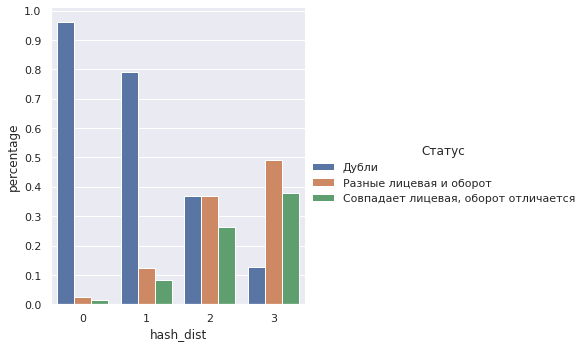

In [ ]:
sns.catplot(
    data=hash_dist_status, kind="bar",
    x="hash_dist", y="percentage", hue="Статус"
    # errorbar="sd", palette="dark", alpha=.6, height=6
);
plt.yticks(np.arange(0, 1.1, 0.1));

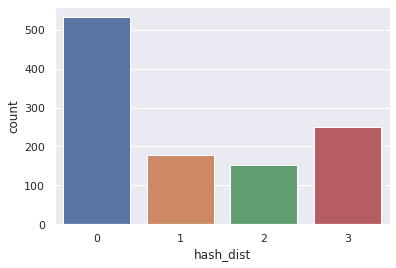

In [ ]:
sns.countplot(data=df, x='hash_dist');

In [ ]:
possible_doubles = pd.read_csv('possible_doubles_base_4_till_220134.csv', index_col=0)
possible_doubles.head()

,hash_dist,hash_db_index_1,hash_db_index_2
0,0,44884,12109
1,0,44885,12110
2,1,45008,11474
3,3,45044,52114
4,3,45046,45055


Сортируем дублирующиеся пары (типа 13, 14 и 14, 13). Таким образом, base_1 всегда будет больше base_2 (см. ниже)

In [ ]:
possible_doubles['temp'] = possible_doubles.apply(
    lambda row: (min(row['hash_db_index_1'], row['hash_db_index_2']), 
                 max(row['hash_db_index_1'], row['hash_db_index_2'])),
    axis=1
)
possible_doubles['hash_db_index_1'] = possible_doubles['temp'].apply(lambda x: x[0])
possible_doubles['hash_db_index_2'] = possible_doubles['temp'].apply(lambda x: x[1])
possible_doubles = possible_doubles.drop('temp', axis=1)

possible_doubles = possible_doubles.drop_duplicates().reset_index().drop('index', axis=1)

In [ ]:
possible_doubles['base_1'] = possible_doubles['hash_db_index_1'].apply(lambda x: df.iloc[x]['base'])
possible_doubles['ID_1'] = possible_doubles['hash_db_index_1'].apply(lambda x: df.iloc[x]['ID'])
possible_doubles['Pic_1'] = possible_doubles['hash_db_index_1'].apply(lambda x: df.iloc[x]['Pic'])

possible_doubles['base_2'] = possible_doubles['hash_db_index_2'].apply(lambda x: df.iloc[x]['base'])
possible_doubles['ID_2'] = possible_doubles['hash_db_index_2'].apply(lambda x: df.iloc[x]['ID'])
possible_doubles['Pic_2'] = possible_doubles['hash_db_index_2'].apply(lambda x: df.iloc[x]['Pic'])

possible_doubles = possible_doubles[['hash_dist', 
                                     'hash_db_index_1', 'base_1', 'ID_1', 'Pic_1', 
                                     'hash_db_index_2', 'base_2', 'ID_2', 'Pic_2', 
                                     ]]
possible_doubles = possible_doubles.drop(['hash_db_index_1', 'hash_db_index_2'], axis=1)
possible_doubles.head()

,hash_dist,base_1,ID_1,Pic_1,base_2,ID_2,Pic_2
0,0,3,205028,1,4,205028,1
1,0,3,205096,1,4,205096,1
2,1,2,104334,1,4,215542,1
3,3,4,215578,1,4,220034,1
4,3,4,215580,1,4,215589,1


In [ ]:
possible_doubles.shape

(1749, 7)

In [ ]:
confirmed_doubles = possible_doubles.merge(
    confirmed_doubles[['base_1', 'ID_1', 'base_2', 'ID_2', 'Статус']], 
    on=['base_1', 'ID_1', 'base_2', 'ID_2'],
    how='right')
confirmed_doubles.head()

,hash_dist,base_1,ID_1,Pic_1,base_2,ID_2,Pic_2,Статус
0,0,1,1204,1,4,216471,1,Дубли
1,0,1,1204,2,4,216471,2,Дубли
2,0,1,1205,1,4,216472,1,Дубли
3,0,1,1205,2,4,216472,2,Дубли
4,0,1,2145,2,4,217037,2,Разные лицевая и оборот


In [ ]:
confirmed_doubles.shape

(1749, 8)

In [ ]:
(confirmed_doubles['Pic_1'] != confirmed_doubles['Pic_2']).sum()

14

In [ ]:
pic_status = confirmed_doubles.groupby(['ID_1', 'ID_2', 'Статус']).apply(
    lambda x: 'both' if x.shape[0] == 2 else x['Pic_1'].to_list()[0]
).reset_index(name='Pics')
pic_status.head()

,ID_1,ID_2,Статус,Pics
0,358,215611,Разные лицевая и оборот,2
1,359,215611,Разные лицевая и оборот,2
2,366,217037,Разные лицевая и оборот,2
3,371,217037,Разные лицевая и оборот,2
4,414,217037,Разные лицевая и оборот,2


In [ ]:
pic_status.shape

(1112, 4)

In [ ]:
pic_status['Pics'].value_counts()

both    637
1       253
2       222
Name: Pics, dtype: int64

In [ ]:
pic_status = pic_status.groupby('Pics')['Статус'].value_counts(
    normalize=True).reset_index(name='percentage') 
# pic_status['Pics'] = pic_status.apply(
#     lambda row: str(min(row['Pic_1'], row['Pic_2'])) + str(max(row['Pic_1'], row['Pic_2'])), 
#     axis=1)
pic_status

,Pics,Статус,percentage
0,1,"Совпадает лицевая, оборот отличается",0.620553
1,1,Дубли,0.351779
2,1,Разные лицевая и оборот,0.027668
3,2,Разные лицевая и оборот,0.932432
4,2,Дубли,0.063063
5,2,"Совпадает лицевая, оборот отличается",0.004505
6,both,Дубли,1.000000


In [ ]:
pic_status = pic_status.sort_values(by='Статус')

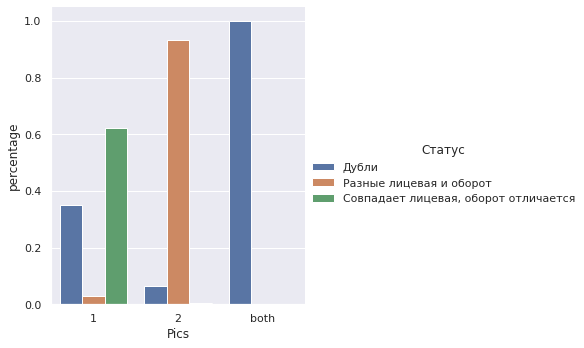

In [ ]:
sns.catplot(
    data=pic_status, kind="bar",
    x="Pics", y="percentage", hue="Статус"
    # errorbar="sd", palette="dark", alpha=.6, height=6
);
# plt.yticks(np.arange(0, 1.1, 0.1));

# Дубли проскочили проверку

## 223952, 100565, 100598

In [ ]:
df = pd.read_csv('hash_database_full.csv', index_col=0)
df.head()

,base,ID,Pic,Pic_url,hash
0,1,0,1,https://forum.vgd.ru/file.php?fid=5476&key=0,806969715521b059
1,1,2,1,https://forum.vgd.ru/file.php?fid=5492&key=0,f4d8cc0ca543d6b6
2,1,3,1,https://forum.vgd.ru/file.php?fid=20890&key=19...,f1732b4d73511723
3,1,4,1,https://forum.vgd.ru/file.php?fid=20894&key=16...,b292ced8b3f2f2f2
4,1,5,1,https://forum.vgd.ru/file.php?fid=20895&key=90...,b8186ca4ae8a989a


In [ ]:
df.shape

(64960, 5)

In [ ]:
hashes_223952 = df[df['ID'] == 223952]['hash'].to_list()
print(hashes_223952)
hashes_223952 = [imagehash.hex_to_hash(v) for v in hashes_223952]

['66e6b282a9e151e1', 'f0b8b8b2b2f2d2d2']


In [ ]:
hashes_100565 = df[df['ID'] == 100565]['hash'].to_list()
print(hashes_100565)
hashes_100565 = [imagehash.hex_to_hash(v) for v in hashes_100565]

['66e0b2ca0968d0d1', 'b1b9b9b2b2f2d2d2']


In [ ]:
hashes_100598 = df[df['ID'] == 100598]['hash'].to_list()
print(hashes_100598)
hashes_100598 = [imagehash.hex_to_hash(v) for v in hashes_100598]

['66c0b2cb0960d061', 'b0b999b232b29292']


In [ ]:
print(f"""
Разница хешей
100565 и 100598: лицевая {hashes_100565[0] - hashes_100598[0]}
                 оборотная {hashes_100565[1] - hashes_100598[1]}
223952 и 100565: лицевая {hashes_223952[0] - hashes_100565[0]} 
                 оборотная {hashes_223952[1] - hashes_100565[1]}
223952 и 100598: лицевая {hashes_223952[0] - hashes_100598[0]}
                 оборотная {hashes_223952[1] - hashes_100598[1]}
""")


Разница хешей
100565 и 100598: лицевая 6
                 оборотная 6
223952 и 100565: лицевая 13 
                 оборотная 4
223952 и 100598: лицевая 13
                 оборотная 8



## 223857 и 100634

In [ ]:
hashes_223857 = df[df['ID'] == 223857]['hash'].to_list()
print(hashes_223857)
hashes_223857 = [imagehash.hex_to_hash(v) for v in hashes_223857]

['4e8e83878181d086', 'b8f2f2aaaaaab282']


In [ ]:
hashes_100634 = df[df['ID'] == 100634]['hash'].to_list()
print(hashes_100634)
hashes_100634 = [imagehash.hex_to_hash(v) for v in hashes_100634]

['4f87838281009185', 'd6537becaaaa8892']


In [ ]:
print(f"""
Разница хешей
223857 и 100634: лицевая {hashes_223857[0] - hashes_100634[0]}
                 оборотная {hashes_223857[1] - hashes_100634[1]}
""")


Разница хешей
223857 и 100634: лицевая 11
                 оборотная 19



## 223730 и 100952

In [ ]:
hashes_223730 = df[df['ID'] == 223730]['hash'].to_list()
print(hashes_223730)
hashes_223730 = [imagehash.hex_to_hash(v) for v in hashes_223730]

['dca2b33232737666', 'a288b0b4e8a890f4']


In [ ]:
hashes_100952 = df[df['ID'] == 100952]['hash'].to_list()
print(hashes_100952)
hashes_100952 = [imagehash.hex_to_hash(v) for v in hashes_100952]

['d46131336b737367', '8080302448094915']


In [ ]:
print(f"""
Разница хешей
223730 и 100952: лицевая {hashes_223730[0] - hashes_100952[0]}
                 оборотная {hashes_223730[1] - hashes_100952[1]}
""")


Разница хешей
223730 и 100952: лицевая 15
                 оборотная 20



## flying_ship_1

In [ ]:
df = pd.read_csv('/content/delcampe_flying_ship_1.csv', index_col=0)
with pd.option_context('display.max_colwidth', None):
    display(df.head())

,ID,url
0,delcampe-flying_ship_1-0,https://delcampe.net/en_GB/collectables/postcards/congo-kinshasa-ex-zaire/belgian-congo-other/antique-postcard-1909s-africa-belgian-congo-missions-nun-with-children-1711036483.html
1,delcampe-flying_ship_1-1,https://delcampe.net/en_GB/collectables/postcards/madagascar/antique-postcard-1910s-africa-madagascar-some-lepers-from-ambohidratrimo-nun-1711036471.html
2,delcampe-flying_ship_1-2,https://delcampe.net/en_GB/collectables/postcards/russia/tsarist-russia-postcard-1902-elizabeth-boehm-bem-writer-tolstoy-yasnaya-polyana-rural-children-1708590526.html
3,delcampe-flying_ship_1-3,https://delcampe.net/en_GB/collectables/postcards/red-cross/rare-tsarist-russia-postcard-1914-artist-signed-bek-marmarcheva-red-cross-sister-of-mercy-nun-wwi-1708589620.html
4,delcampe-flying_ship_1-4,https://delcampe.net/en_GB/collectables/postcards/red-cross/rare-tsarist-russian-postcard-1915-by-makovsky-sister-of-mercy-white-angel-wwi-1708588687.html


In [ ]:
df.shape

(9600, 2)

In [ ]:
df['url_suffix'] = df['url'].apply(lambda x: x.split('/')[-1].replace('.html', ''))
df['lot_name'] = df['url_suffix'].apply(lambda x: '-'.join(x.split('-')[:-1]))
df['lot_number'] = df['url_suffix'].apply(lambda x: x.split('-')[-1])
with pd.option_context('display.max_colwidth', None):
    display(df.head())

,ID,url,lot_name,url_suffix,lot_number
0,delcampe-flying_ship_1-0,https://delcampe.net/en_GB/collectables/postcards/congo-kinshasa-ex-zaire/belgian-congo-other/antique-postcard-1909s-africa-belgian-congo-missions-nun-with-children-1711036483.html,antique-postcard-1909s-africa-belgian-congo-missions-nun-with-children,antique-postcard-1909s-africa-belgian-congo-missions-nun-with-children-1711036483,1711036483
1,delcampe-flying_ship_1-1,https://delcampe.net/en_GB/collectables/postcards/madagascar/antique-postcard-1910s-africa-madagascar-some-lepers-from-ambohidratrimo-nun-1711036471.html,antique-postcard-1910s-africa-madagascar-some-lepers-from-ambohidratrimo-nun,antique-postcard-1910s-africa-madagascar-some-lepers-from-ambohidratrimo-nun-1711036471,1711036471
2,delcampe-flying_ship_1-2,https://delcampe.net/en_GB/collectables/postcards/russia/tsarist-russia-postcard-1902-elizabeth-boehm-bem-writer-tolstoy-yasnaya-polyana-rural-children-1708590526.html,tsarist-russia-postcard-1902-elizabeth-boehm-bem-writer-tolstoy-yasnaya-polyana-rural-children,tsarist-russia-postcard-1902-elizabeth-boehm-bem-writer-tolstoy-yasnaya-polyana-rural-children-1708590526,1708590526
3,delcampe-flying_ship_1-3,https://delcampe.net/en_GB/collectables/postcards/red-cross/rare-tsarist-russia-postcard-1914-artist-signed-bek-marmarcheva-red-cross-sister-of-mercy-nun-wwi-1708589620.html,rare-tsarist-russia-postcard-1914-artist-signed-bek-marmarcheva-red-cross-sister-of-mercy-nun-wwi,rare-tsarist-russia-postcard-1914-artist-signed-bek-marmarcheva-red-cross-sister-of-mercy-nun-wwi-1708589620,1708589620
4,delcampe-flying_ship_1-4,https://delcampe.net/en_GB/collectables/postcards/red-cross/rare-tsarist-russian-postcard-1915-by-makovsky-sister-of-mercy-white-angel-wwi-1708588687.html,rare-tsarist-russian-postcard-1915-by-makovsky-sister-of-mercy-white-angel-wwi,rare-tsarist-russian-postcard-1915-by-makovsky-sister-of-mercy-white-angel-wwi-1708588687,1708588687


In [ ]:
df['lot_name'].nunique()

9429

In [ ]:
df['lot_number'].nunique()

9600

In [ ]:
lot_name_count = df.groupby('lot_name')['ID'].count().sort_values(ascending=False).reset_index().rename(
    columns={'ID': 'count'}
)
names_count_gt_1 = lot_name_count[lot_name_count['count'] > 1]['lot_name'].to_list()
names_count_gt_1[:10]

['vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space',
 'tsarist-russia-kishinev-photo-postcard-1909s-russian-opera-singer-star-leonid-sobinov',
 'tsarist-russia-zhabye-village-austria-hungary-postcard-1910s-artist-slasten-cossack-haidamaka-by-shevchenko',
 'tsarist-russia-unused-postcard-1909s-russian-writer-leo-tolstoy-at-work-in-his-cabinet',
 'tsarist-russia-postcard-1910s-grave-of-leo-tolstoy-in-yasnaya-polyana-artist-signed-i-gorelow',
 'tsarist-russia-photo-postcard-1909s-mephistopheles-feodor-chaliapin-shalyapin-russian-opera-singer',
 'vintage-ussr-russian-photo-postcard-1947-russian-ballet-star-galina-ulanova-in-giselle',
 'vintage-russian-ussr-postcard-1955-by-uzbekov-soviet-sport-tv-football-fans-grandfather-and-grandson',
 'tsarist-russia-postcard-1909s-great-russian-writer-anton-chekhov-anton-cehov',
 'vintage-russian-postcard-1967-russian-folk-tale-rooster-with-scythe-sun-mushroom-artist-ershov']

In [ ]:
df[df['lot_name'].isin(names_count_gt_1)].to_csv('flying_ship_1_names_count_gt_1.csv')

In [ ]:
with pd.option_context('display.max_colwidth', None):
    display(df[df['lot_name'] == 
    'vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space'])

,ID,url,lot_name,url_suffix,lot_number
2459,delcampe-flying_ship_1-2459,https://delcampe.net/en_GB/collectables/postcards/famous-people/famous-ladies/vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space-1463231129.html,vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space,vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space-1463231129,1463231129
2460,delcampe-flying_ship_1-2460,https://delcampe.net/en_GB/collectables/postcards/famous-people/famous-ladies/vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space-1463230562.html,vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space,vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space-1463230562,1463230562
2461,delcampe-flying_ship_1-2461,https://delcampe.net/en_GB/collectables/postcards/famous-people/famous-ladies/vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space-1463230070.html,vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space,vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space-1463230070,1463230070
2462,delcampe-flying_ship_1-2462,https://delcampe.net/en_GB/collectables/postcards/famous-people/famous-ladies/vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space-1463228303.html,vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space,vintage-russian-postcard-1963-1st-woman-pilot-cosmonaut-valentina-tereshkova-astronaut-space-1463228303,1463228303
